## This will predict the sales_price of the houses in Chennai

In [1]:
# Importing Libraries       
import pandas as pd     
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
#Importing the dataset
df = pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.shape

(7109, 22)

In [4]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [5]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# dropping the column not required
df.drop('PRT_ID',axis=1,inplace=True)

In [8]:
df['AGE'] = pd.to_datetime(df['DATE_SALE']) - pd.to_datetime(df['DATE_BUILD'])
df['AGE'] = df['AGE'].dt.days
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802


## Data Cleaning

In [9]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [10]:
df['AREA'] = df['AREA'].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Karpakkam','Ana Nagar',
                        'Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],
    ['T Nagar','Chrompet','Chrompet','Karapakkam','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])

In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [12]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [13]:
df['SALE_COND'] = df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],
                                      ['AbNormal','Partial','Partial','AdjLand'])

In [14]:
df.SALE_COND.unique() 

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [15]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [16]:
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1,'No':0,'Noo':0})
df.PARK_FACIL.unique()

array([1, 0])

In [17]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [18]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others']) 
df.BUILDTYPE.unique()                                                           

array(['Commercial', 'Others', 'House'], dtype=object)

In [19]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [20]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace(['All Pub','NoSeWa','NoSewr '],['AllPub','NoSewr','NoSewr'])
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [21]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [22]:
df['STREET'] = df['STREET'].replace(['Pavd','No Access'],['Paved','NoAccess'])
df.STREET.unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [23]:
df.MZZONE.unique()      

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

## Filling the Column with Missing Values 

In [24]:
df.N_BATHROOM.unique()     

array([ 1.,  2., nan])

In [25]:
df.N_BATHROOM.mode()[0]

1.0

In [26]:
df.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [27]:
df.N_BATHROOM.fillna(df.N_BATHROOM.mode()[0],inplace=True)

In [28]:
df.N_BATHROOM = df.N_BATHROOM.astype(int)

In [29]:
df.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

In [30]:
df.N_BEDROOM.value_counts() 

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [31]:
df.N_BEDROOM.mode()[0]

1.0

In [32]:
df.N_BEDROOM.fillna(df.N_BEDROOM.mode()[0],inplace=True)

In [33]:
df.N_BEDROOM = df.N_BEDROOM.astype(int)

In [34]:
df.QS_OVERALL.fillna(df.QS_OVERALL.mean(),inplace=True) 

In [35]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,Adyar,909,70,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152
3,Velachery,1855,14,3,2,5,Family,0,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,Karapakkam,1226,84,1,1,3,AbNormal,1,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802


In [36]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE'],
      dtype='object')

In [37]:
df.isnull().sum() 

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
AGE              0
dtype: int64

##**Exploratory Data Analysis**

# Finding Relation between features and Target

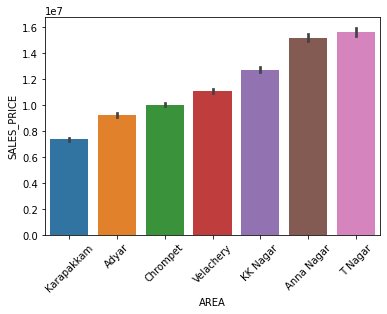

In [38]:
import warnings
warnings.filterwarnings('ignore')

area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot('AREA','SALES_PRICE', data=df, order = area_order);
plt.xticks(rotation=45); 

There is a linear relationship betweeen Area and Sales Price.

'AREA' is an important feature for Sales_price prediction 

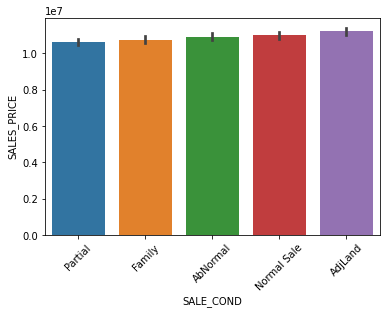

In [39]:
sale_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot('SALE_COND','SALES_PRICE',data=df, order=sale_cond_order);
plt.xticks(rotation = 45);

We can see there is no affect of Sales_Condition on Sales_Price of the House

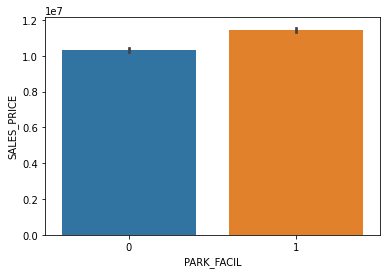

In [40]:
sns.barplot('PARK_FACIL','SALES_PRICE',data=df);

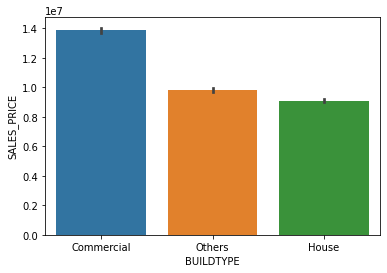

In [41]:
sns.barplot('BUILDTYPE','SALES_PRICE',data=df); 

There is not exact linear trend betwen sales_price and build_type. So while encoding we will do one_hot_encoding here

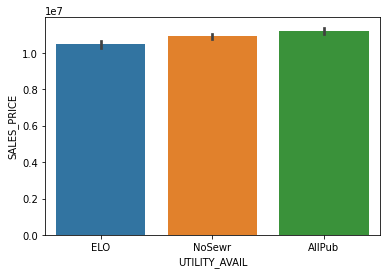

In [42]:
util_avail_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot('UTILITY_AVAIL','SALES_PRICE',data=df,order=util_avail_order);

There is a linear relationship between Utility_AVAILABLITY and Sales_price

It is an important feature

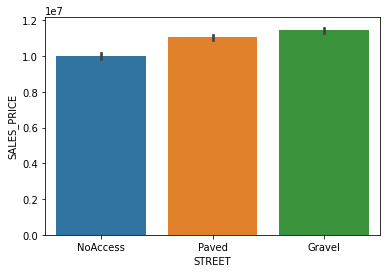

In [43]:
street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot('STREET','SALES_PRICE',data=df,order = street_order); 

There is a linear relationship between STREET and SALES_PRICE

It is an important feature to consider

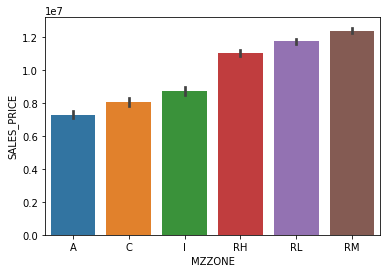

In [44]:
mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot('MZZONE','SALES_PRICE',data=df, order=mzzone_order);

Here 'A', 'C', 'I' are linear and 'RH','RM',RL' are linear.
They are piecewise linear.

While encoding we can give 0 to A, 1 to C, 2 to I , 4 to RH, 5 RL and 6 to RM

## Looking at the Continuous Data Column 

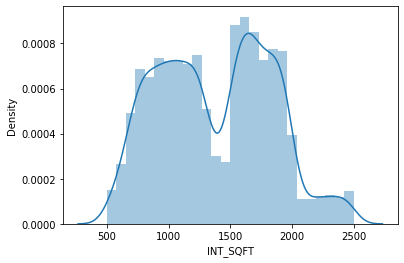

In [45]:
sns.distplot(df.INT_SQFT);

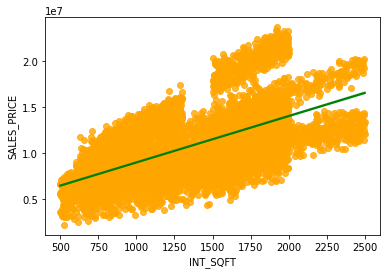

In [46]:
sns.regplot(df.INT_SQFT,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});

There is a linear trend between Sales_price and INT_SQFT

It is an important feature

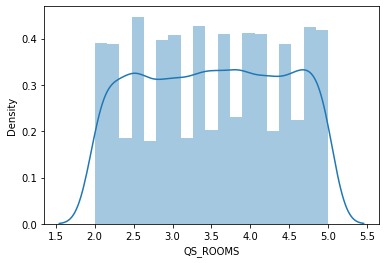

In [47]:
sns.distplot(df.QS_ROOMS);

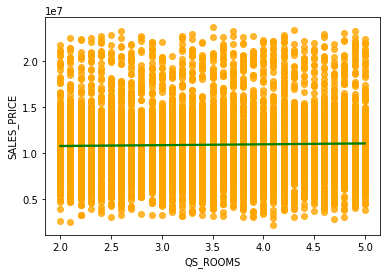

In [48]:
sns.regplot(df.QS_ROOMS,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});

There is no relatin between Sales_price and QS_Rooms

We will drop this feature


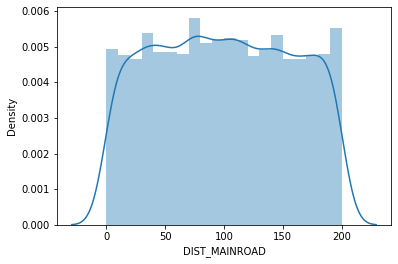

In [49]:
sns.distplot(df.DIST_MAINROAD);

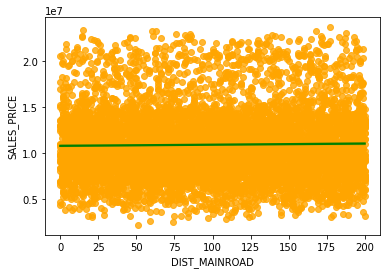

In [50]:
sns.regplot(df.DIST_MAINROAD,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});

There is not relation between Sales_price and distance from Mainroad

We will drop this feature

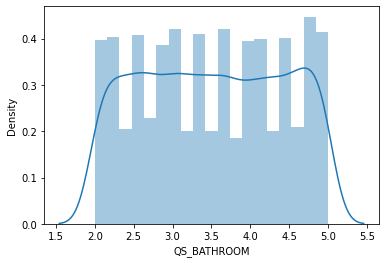

In [51]:
sns.distplot(df.QS_BATHROOM);

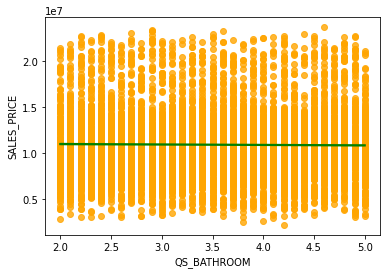

In [52]:
sns.regplot(df.QS_BATHROOM,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});

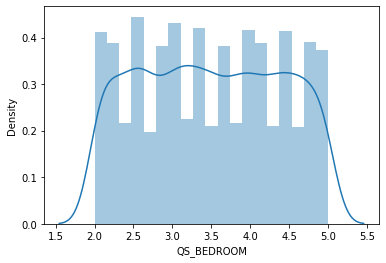

In [53]:
sns.distplot(df.QS_BEDROOM);

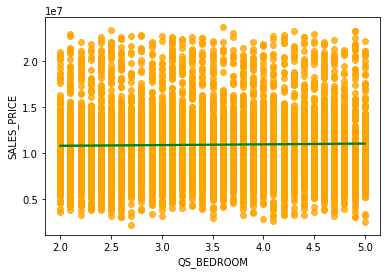

In [54]:
sns.regplot(df.QS_BEDROOM,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});

This column is not affecting SALES_PRICE.

We will drop this Column


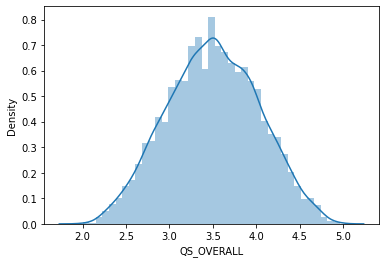

In [55]:
sns.distplot(df.QS_OVERALL);

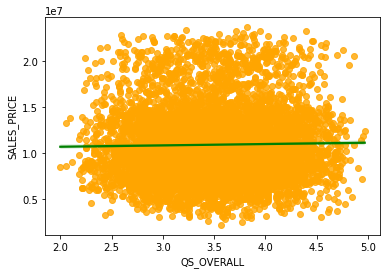

In [56]:
sns.regplot(df.QS_OVERALL,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});

There is no relationship between Sales_price and QS_overall 

We will drop this feature also

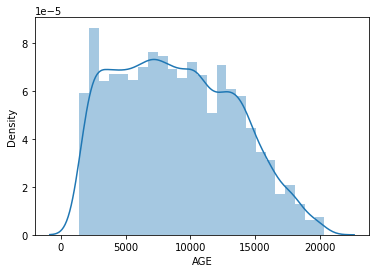

In [57]:
sns.distplot(df.AGE);

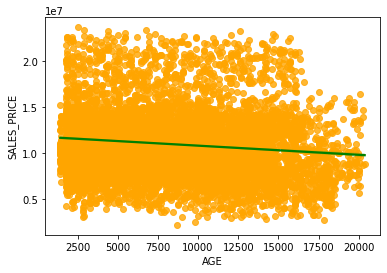

In [58]:
sns.regplot(df.AGE,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});

There is a clear trend, as the age is increasing Sales_price is decreasing 

It is an important feature

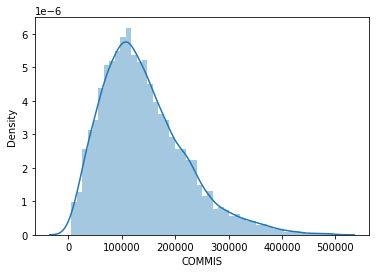

In [59]:
sns.distplot(df.COMMIS);

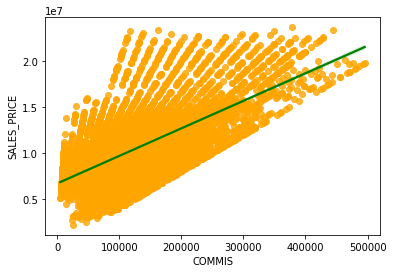

In [60]:
sns.regplot(df.COMMIS,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});

The Commisssion column is important only after the house is sold.

It has no use in predicting the Sales_Price.

We will drop this column.

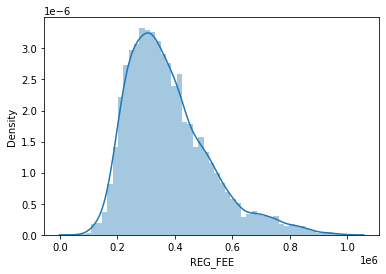

In [61]:
sns.distplot(df.REG_FEE);

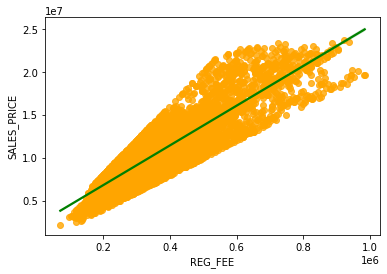

In [62]:
sns.regplot(df.REG_FEE,df.SALES_PRICE,scatter_kws={'color':'orange'},line_kws={'color':'green'});


REG-FEE column has no use in predicting the Sales_Price.

We will drop this column.

# Insights from EDA

  1. 'AREA','INT_SQFT', 'N_BEDROOM','N_BATHROOM','N_ROOM', 
  , 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL','STREET',
   'MZZONE','AGE'  -- These columns have direct relation with SALES_PRICE Of the house.


 2.  'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','SALE_COND',   'DIST_MAINROAD', 'QS_OVERALL', 'REG_FEE', 'COMMIS' --- are not helpful in predicting the Sales_Price of the house
 

# Encoding the Data

In [63]:
#Label encoding the Columns
df.AREA = df.AREA.map({'Karapakkam':0 ,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,
                       'Anna Nagar':5 , 'T Nagar':6})
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO':0,'NoSewr':1,'AllPub':2})
df.STREET = df.STREET.map({'NoAccess':0,'Paved':1,'Gravel':2})
df.MZZONE = df.MZZONE.map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})  

In [64]:
df.dtypes

AREA               int64
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL         int64
BUILDTYPE         object
UTILITY_AVAIL      int64
STREET             int64
MZZONE             int64
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
AGE                int64
dtype: object

In [65]:
df = pd.get_dummies(df, prefix='build',columns=['BUILDTYPE'])

In [66]:
#the 'Reg_fee' column is not required for predicting the sales_price, so we will drop it
df.drop(['REG_FEE','SALE_COND','COMMIS','DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1, inplace=True)       

In [67]:
df.head()  

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,build_Commercial,build_House,build_Others
0,0,1004,1,1,3,1,2,1,0,7600000,16031,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,4015,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,7152,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,8030,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,10802,0,0,1


In [68]:
cols = set(df.columns)        
cols.remove('SALES_PRICE') 

In [69]:
X = df[cols] 
Y = df['SALES_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)

In [70]:
scaler = StandardScaler() 
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

## Building the Model

1. Linear Regressor

In [71]:
# Building thte model 
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled,y_train) 

lin_pred = lin_reg.predict(x_test_scaled)
lin_score = r2_score(y_test,lin_pred) 
lin_score 

0.9190580931424872

2. Decision Tree Regressor

In [72]:
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train) 
dt_pred = dt.predict(x_test_scaled) 

dt_r_score = r2_score(y_test,dt_pred)
dt_r_score

0.9733470849401837

3. KNN Regressor

In [73]:
knn = KNeighborsRegressor()
knn.fit(x_train_scaled , y_train)
knn_pred = knn.predict(x_test_scaled)

knn_r_score = r2_score(y_test,knn_pred)
knn_r_score

0.9535962886303144

4. Random Forest Regressor

In [74]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train_scaled, y_train)
random_forest_pred = random_forest.predict(x_test_scaled)

random_forest_score = r2_score(y_test,random_forest_pred)
random_forest_score

0.9890478304554261

5. XGB Regressor

In [75]:
import warnings
warnings.filterwarnings("ignore")

xgb = XGBRegressor()
xgb.fit(x_train_scaled,y_train)
xgb_pred = xgb.predict(x_test_scaled)

xgb_score = r2_score(y_test,xgb_pred)
xgb_score

[15:09:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9892943998263258

Final Result 

1. Linear Regression gave r2_score of 92% 
2. Decision Tree gave r2 score of 97.3%
3. KNN Regression gave r2 score of 95.2%
4. Random Forest gave r2 score of 98.85%
5. XGB Regressor gave r2 score of 98.88 %


Random Forest and XGB Regressor both have got best r2 values.